# **FLICKFLARE**


![FlickFlareLogo](Images_Movie_Recommendation_System/FlickFlareLogo.PNG)









### **Project Phase 4**

### **Authors**
#### Kelvin Mwaura
#### Abigael Nyabaga
#### Prossy Nansubuga

# **Movie Recommender System**
## **Overview: FlickFlare**

FlickFlare is a cutting-edge movie streaming platform designed to bring a diverse and expansive collection of films directly to your screen. Whether you're a fan of classic cinema, indie gems, or the latest blockbuster hits, FlickFlare has something for everyone.

To enhance user satisfaction and ensure that our movie recommendations align with user interests, we are introducing a sophisticated movie recommender system. This system will leverage user ratings and genre preferences to suggest the top 5 movies tailored to individual tastes.

## **Business Understanding**
### **Problem Statement**

FlickFlare, a movie streaming company, received feedback from users on the Google Play Store indicating that the movies recommended to them did not match their interests, leading to customer dissatisfaction.

To address this issue, FlickFlare has approached us, RODATA-a data analytics company, to build a movie recommender system. This system will aid in suggesting the top 5 movies to users based on their ratings and preferred genres.

## **Objectives**

###  **Main Objective**

    To build a movie recommender system that suggests top movies to streaming users based on movie ratings and preferred genres.

### Specific Objectives
1. **Recommendation Accuracy**: Design an algorithm to precisely identify and recommend the top five movies that match user ratings and preferred genres, ensuring high relevance to individual preferences.
2. **Boosting User Interaction**: Develop a recommendation system aimed at significantly enhancing user engagement by providing personalized movie suggestions, leading to increased interaction and longer viewing times.
3. **Customized Movie Suggestions**: Create tailored recommendations that align with each user's unique interests and viewing patterns.
4. **Improving Recommendation Precision**: Enhance the algorithm's accuracy over time by incorporating user feedback and continuously refining the recommendation process to better match user preferences.

### **Metric for Success**
To achieve the success metrics for the recommendation system, below is structured approach that we shall use to ensure we meet both the Recommendation Accuracy and User Interaction goals

1. **Recommendation Accuracy**
   
    Goal: Achieve at least 80% accuracy in recommending the top five movies.
    Steps:
        Prepare Data: Clean and preprocess movie ratings and genre data.
        Modeling: Use collaborative filtering, content-based filtering, or a hybrid approach.
        Evaluate: Measure accuracy with precision, recall, and top-K metrics.
        Tune and Validate: Optimize parameters and use cross-validation.
        Test: Deploy and test with users, adjust based on feedback.

3. **User Interaction**

    Goal: Increase user engagement (interaction rates and average viewing time) by at least 20% within three months.
    Steps:
        Track Metrics: Define and monitor current engagement metrics.
        Deploy System: Launch the recommendation system and promote new features.
        Measure Impact: Compare pre- and post-deployment metrics.
        Optimize: Use user feedback to refine the system.
        Report: Create reports on engagement improvements and adjust strategies as needed.


### **Data Understanding**

The data used has been sourced from the MovieLens dataset from the GroupLens research lab at the University of Minnesota.

It contains 100,836 ratings and 3,683 tag applications across 9,742 movies. These data were created by 610 users.

The dataset is distributed among four CSV files:

    links.csv
    movies.csv
    ratings.csv
    tags.csv

1. **movies.csv**

Each line of this file after the header row represents one movie and has the following columns:

    movieId: Unique ID for each movie
    title: Name of the movie followed by its year of release
    genres: Categories that a movie might fall into, separated by |

2. **links.csv**

This file contains identifiers that can be used to link this data to other data sources like IMDb. Each line of this file after the header row represents one IMDb link and has the following columns:

    movieId: Unique ID for each movie as used by MovieLens
    imdbId: Unique ID for each movie as used by IMDb
    tmdbId: Unique ID for each movie as used by The Movie Database (TMDb)

3. **tags.csv**

Each line of this file after the header row represents one tag applied to one movie by one user and has the following columns:

    userId: Unique ID for each user
    movieId: Unique ID for each movie
    tag: User-generated metadata about the movie in the form of short, meaningful phrases
    timestamp: Time when the tag was provided by the user

4. **ratings.csv**

Each line of this file after the header row represents one rating and has the following columns:

    userId: Unique ID for each user
    movieId: Unique ID for each movie
    rating: Rating given by the user for the movie. Ratings are made on a 5-star scale with 0.5 increments
    timestamp: Time when the rating was given

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reading the different datasets into pandas DataFrames
tags_df = pd.read_csv('tags.csv')
movies_df = pd.read_csv('movies.csv')
ratings_df = pd.read_csv('ratings.csv')
links_df = pd.read_csv('links.csv')

# Displaying the first few rows of each DataFrame to confirm successful loading
print("Tags DataFrame:")
print(tags_df.head())

print("\nMovies DataFrame:")
print(movies_df.head())

print("\nRatings DataFrame:")
print(ratings_df.head())

print("\nLinks DataFrame:")
print(links_df.head())


Tags DataFrame:
   userId  movieId              tag   timestamp
0       2    60756            funny  1445714994
1       2    60756  Highly quotable  1445714996
2       2    60756     will ferrell  1445714992
3       2    89774     Boxing story  1445715207
4       2    89774              MMA  1445715200

Movies DataFrame:
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  

Ratings DataFrame:
   userId  movieId  rating  timestamp
0       1        1     4

### **Inspect and Handle Missing Values**

    Check for Missing Values: We will determine if there are any missing values in the DataFrames.

In [2]:
print("Missing values in tags_df:")
print(tags_df.isnull().sum())

print("\nMissing values in movies_df:")
print(movies_df.isnull().sum())

print("\nMissing values in ratings_df:")
print(ratings_df.isnull().sum())

print("\nMissing values in links_df:")
print(links_df.isnull().sum())


Missing values in tags_df:
userId       0
movieId      0
tag          0
timestamp    0
dtype: int64

Missing values in movies_df:
movieId    0
title      0
genres     0
dtype: int64

Missing values in ratings_df:
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

Missing values in links_df:
movieId    0
imdbId     0
tmdbId     8
dtype: int64


### **Review Missing Data:**

**Implications of Missing tmdbId Values:**

1. **Data Integrity:** The missing tmdbId values mean that there are some records where the unique identifier for movies is absent. This can lead to incomplete information when attempting to link or fetch movie details.

2. **Potential Issues in Analysis:** If we need to perform operations like merging with other datasets that use tmdbId, these records will not match and may result in missing data or errors in your analysis.

3. **Impact on Model Training:** For machine learning models or recommendations, missing identifiers can lead to incomplete data for feature engineering, which can affect model performance and accuracy.

**Steps Taken to Handle Missing Values:**

1. Identified Missing Records:
2. Dropping Rows with Missing tmdbId

In [3]:
missing_tmdb_ids = links_df[links_df['tmdbId'].isnull()]
print("\nRecords with missing tmdbId:")
print(missing_tmdb_ids)



Records with missing tmdbId:
      movieId  imdbId  tmdbId
624       791  113610     NaN
843      1107  102336     NaN
2141     2851   81454     NaN
3027     4051   56600     NaN
5532    26587   92337     NaN
5854    32600  377059     NaN
6059    40697  105946     NaN
7382    79299  874957     NaN


In [4]:
# Check for any remaining missing values in all DataFrames
print("\nMissing values in tags_df:")
print(tags_df.isnull().sum())

print("\nMissing values in movies_df:")
print(movies_df.isnull().sum())

print("\nMissing values in ratings_df:")
print(ratings_df.isnull().sum())

print("\nMissing values in links_df:")
print(links_df.isnull().sum())



Missing values in tags_df:
userId       0
movieId      0
tag          0
timestamp    0
dtype: int64

Missing values in movies_df:
movieId    0
title      0
genres     0
dtype: int64

Missing values in ratings_df:
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

Missing values in links_df:
movieId    0
imdbId     0
tmdbId     8
dtype: int64


In [5]:
# Check for duplicates in all DataFrames
print("\nDuplicates in tags_df:")
print(tags_df.duplicated().sum())

print("\nDuplicates in movies_df:")
print(movies_df.duplicated().sum())

print("\nDuplicates in ratings_df:")
print(ratings_df.duplicated().sum())

print("\nDuplicates in links_df:")
print(links_df.duplicated().sum())

# Remove duplicates if found
tags_df.drop_duplicates(inplace=True)
movies_df.drop_duplicates(inplace=True)
ratings_df.drop_duplicates(inplace=True)
links_df.drop_duplicates(inplace=True)



Duplicates in tags_df:
0

Duplicates in movies_df:
0

Duplicates in ratings_df:
0

Duplicates in links_df:
0


In [6]:
#Check and Fix Data Types: Ensure columns have the correct data types
print("\nData types in tags_df:")
print(tags_df.dtypes)

print("\nData types in movies_df:")
print(movies_df.dtypes)

print("\nData types in ratings_df:")
print(ratings_df.dtypes)

print("\nData types in links_df:")
print(links_df.dtypes)




Data types in tags_df:
userId        int64
movieId       int64
tag          object
timestamp     int64
dtype: object

Data types in movies_df:
movieId     int64
title      object
genres     object
dtype: object

Data types in ratings_df:
userId         int64
movieId        int64
rating       float64
timestamp      int64
dtype: object

Data types in links_df:
movieId      int64
imdbId       int64
tmdbId     float64
dtype: object


**Convert timestamp into datetime object**

Purpose: Converts timestamps from Unix epoch time (seconds since 1970-01-01) to datetime objects.

Parameter unit='s': Specifies that the timestamps are in seconds. If your timestamps are in milliseconds, you would use unit='ms'.

The function below is designed to convert timestamp values into datetime objects, which is useful for time-based analysis.

In [7]:
import pandas as pd

# Convert timestamps to datetime
tags_df['timestamp'] = pd.to_datetime(tags_df['timestamp'], unit='s')
ratings_df['timestamp'] = pd.to_datetime(ratings_df['timestamp'], unit='s')



**Expand genres Column**

We shall expand the genres column in movies_df into separate binary columns:

In [8]:
# Split genres into separate columns
genres_expanded = movies_df['genres'].str.get_dummies(sep='|')

# Concatenate the expanded genres columns with the original DataFrame
movies_df = pd.concat([movies_df, genres_expanded], axis=1)

print("Movies DataFrame with expanded genres:")
print(movies_df.head())



Movies DataFrame with expanded genres:
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  (no genres listed)  Action  \
0  Adventure|Animation|Children|Comedy|Fantasy                   0       0   
1                   Adventure|Children|Fantasy                   0       0   
2                               Comedy|Romance                   0       0   
3                         Comedy|Drama|Romance                   0       0   
4                                       Comedy                   0       0   

   Adventure  Animation  Children  Comedy  Crime  ...  Film-Noir  Horror  \
0          1          1         1       1      0  ...          0       0   
1          1          0         1      

**Join DataFrames**

We shall now join movies_df with tags_df and ratings_df, and include links_df:

In [9]:
# Join movies_df with tags_df on 'movieId'
movies_tags_df = pd.merge(movies_df, tags_df, on='movieId', how='left')

# Join movies_df with ratings_df on 'movieId'
movies_ratings_df = pd.merge(movies_df, ratings_df, on='movieId', how='left')

# Join movies_df with links_df on 'movieId'
movies_links_df = pd.merge(movies_df, links_df, on='movieId', how='left')

# Print shapes and sample data for verification
print("\nMovies and Tags DataFrame:")
print(movies_tags_df.head())
print("\nMovies and Ratings DataFrame:")
print(movies_ratings_df.head())
print("\nMovies and Links DataFrame:")
print(movies_links_df.head())



Movies and Tags DataFrame:
   movieId             title                                       genres  \
0        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
1        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
2        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
3        2    Jumanji (1995)                   Adventure|Children|Fantasy   
4        2    Jumanji (1995)                   Adventure|Children|Fantasy   

   (no genres listed)  Action  Adventure  Animation  Children  Comedy  Crime  \
0                   0       0          1          1         1       1      0   
1                   0       0          1          1         1       1      0   
2                   0       0          1          1         1       1      0   
3                   0       0          1          0         1       0      0   
4                   0       0          1          0         1       0      0   

   ...  Musical  Mystery  Ro

Handle Missing Values after merging

After merging, there might be missing values if the joined DataFrames had entries not present in movies_df. You might want to handle these, especially for tmdbId in links_df

In [10]:
# Check for missing values
print("Missing values in Movies and Links DataFrame:")
print(movies_links_df.isnull().sum())

# Handle missing values as needed (e.g., fill with default value or drop)
# Example: Drop rows where 'tmdbId' is missing
movies_links_df.dropna(subset=['tmdbId'], inplace=True)


Missing values in Movies and Links DataFrame:
movieId               0
title                 0
genres                0
(no genres listed)    0
Action                0
Adventure             0
Animation             0
Children              0
Comedy                0
Crime                 0
Documentary           0
Drama                 0
Fantasy               0
Film-Noir             0
Horror                0
IMAX                  0
Musical               0
Mystery               0
Romance               0
Sci-Fi                0
Thriller              0
War                   0
Western               0
imdbId                0
tmdbId                8
dtype: int64


In [11]:
# Check for missing values
print("Missing values in Movies and Links DataFrame:")
print(movies_links_df.isnull().sum())

# Handle missing values as needed (e.g., fill with default value or drop)
# Example: Drop rows where 'tmdbId' is missing
movies_links_df.dropna(subset=['tmdbId'], inplace=True)


Missing values in Movies and Links DataFrame:
movieId               0
title                 0
genres                0
(no genres listed)    0
Action                0
Adventure             0
Animation             0
Children              0
Comedy                0
Crime                 0
Documentary           0
Drama                 0
Fantasy               0
Film-Noir             0
Horror                0
IMAX                  0
Musical               0
Mystery               0
Romance               0
Sci-Fi                0
Thriller              0
War                   0
Western               0
imdbId                0
tmdbId                0
dtype: int64


In [12]:
# Check for duplicate column names
print("Duplicate columns:")
print(movies_links_df.columns[movies_links_df.columns.duplicated()])


Duplicate columns:
Index([], dtype='object')


In [13]:
import pandas as pd

# Remove duplicate genre columns
# Find duplicated columns
duplicate_columns = movies_links_df.columns[movies_links_df.columns.duplicated()]

# Drop duplicated columns
movies_links_df = movies_links_df.loc[:, ~movies_links_df.columns.duplicated()]

# Verify the DataFrame
print("Columns after removing duplicates:")
print(movies_links_df.columns)
print("\nSample data from cleaned DataFrame:")
print(movies_links_df.head())


Columns after removing duplicates:
Index(['movieId', 'title', 'genres', '(no genres listed)', 'Action',
       'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'IMAX', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western', 'imdbId', 'tmdbId'],
      dtype='object')

Sample data from cleaned DataFrame:
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  (no genres listed)  Action  \
0  Adventure|Animation|Children|Comedy|Fantasy                   0       0   
1                   Adventure|Children|Fantasy                   0       0   
2                               Comedy|Romance                  

In [14]:
print("Final shape of DataFrame:", movies_links_df.shape)


Final shape of DataFrame: (9734, 25)


In [15]:
print("Columns after removing duplicates:")
print(movies_links_df.columns)


Columns after removing duplicates:
Index(['movieId', 'title', 'genres', '(no genres listed)', 'Action',
       'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'IMAX', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western', 'imdbId', 'tmdbId'],
      dtype='object')


In [16]:
print("Final shape of DataFrame:", movies_links_df.shape)
print("Sample data from cleaned DataFrame:")
movies_links_df.head()


Final shape of DataFrame: (9734, 25)
Sample data from cleaned DataFrame:


movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  (no genres listed)  Action  \
0  Adventure|Animation|Children|Comedy|Fantasy                   0       0   
1                   Adventure|Children|Fantasy                   0       0   
2                               Comedy|Romance                   0       0   
3                         Comedy|Drama|Romance                   0       0   
4                                       Comedy                   0       0   

   Adventure  Animation  Children  Comedy  Crime  ...  IMAX  Musical  Mystery  \
0          1          1         1       1      0  ...     0        0        0   
1          1          0         1       0      0  ...     0        0        0   
2          0          0         0       1      0  ...     0        0        0   
3          0          0         0       1      0  ...     0        0        0   
4          0          0         0       1      0  ...     0        0        0   

   Romance  Sci-Fi  Thriller  War  Western  imdbId   tmdbId  
0        0       0         0    0        0  114709    862.0  
1        0       0         0    0        0  113497   8844.0  
2        1       0         0    0        0  113228  15602.0  
3        1       0         0    0        0  114885  31357.0  
4        0       0         0    0        0  113041  11862.0  

[5 rows x 25 columns]

In [17]:
movies_links_df.dtypes

movieId                 int64
title                  object
genres                 object
(no genres listed)      int64
Action                  int64
Adventure               int64
Animation               int64
Children                int64
Comedy                  int64
Crime                   int64
Documentary             int64
Drama                   int64
Fantasy                 int64
Film-Noir               int64
Horror                  int64
IMAX                    int64
Musical                 int64
Mystery                 int64
Romance                 int64
Sci-Fi                  int64
Thriller                int64
War                     int64
Western                 int64
imdbId                  int64
tmdbId                float64
dtype: object

### **Exploratory Data Analysis (EDA):**
Conduct EDA to understand distributions and relationships in your data.

**Univariate Analysis**

Our key features for univariate analysis:
>genres: To analyze the distribution of different genres.

>tag: To analyze the frequency and distribution of different tags.

>rating: To analyze the distribution of ratings given by users.

These columns are essential for univariate analysis as they provide valuable insights into the distribution and characteristics of genres, tags, and ratings within the dataset.

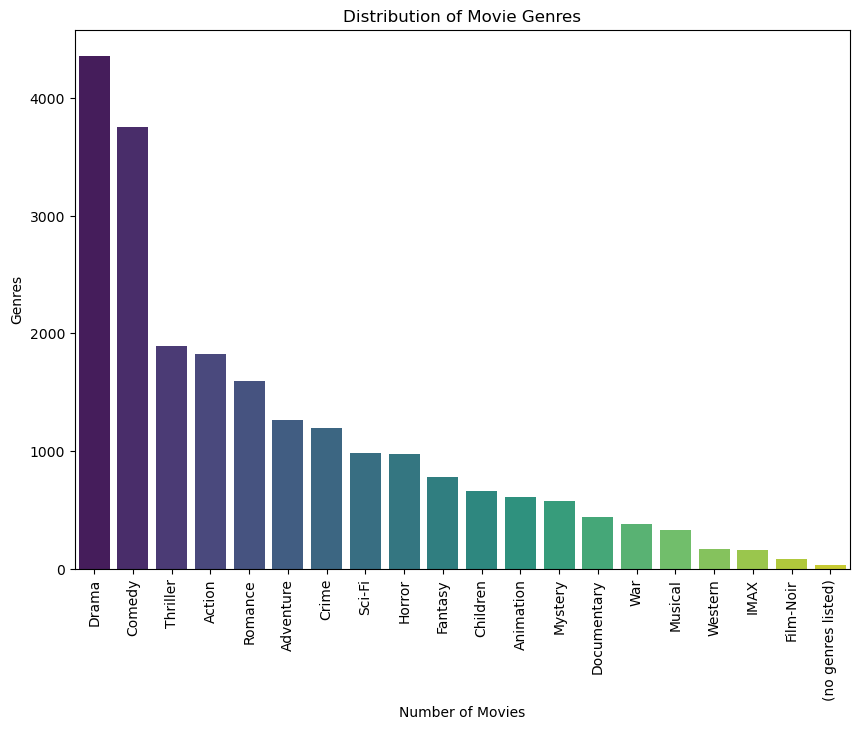

In [18]:
# Univariate Analysis for Genres
plt.figure(figsize=(10, 7))
genre_counts = movies_df.iloc[:, 3:].sum().sort_values(ascending=False)
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette="viridis")
plt.xticks(rotation=90)
plt.title('Distribution of Movie Genres')
plt.xlabel('Number of Movies')
plt.ylabel('Genres')
plt.show()


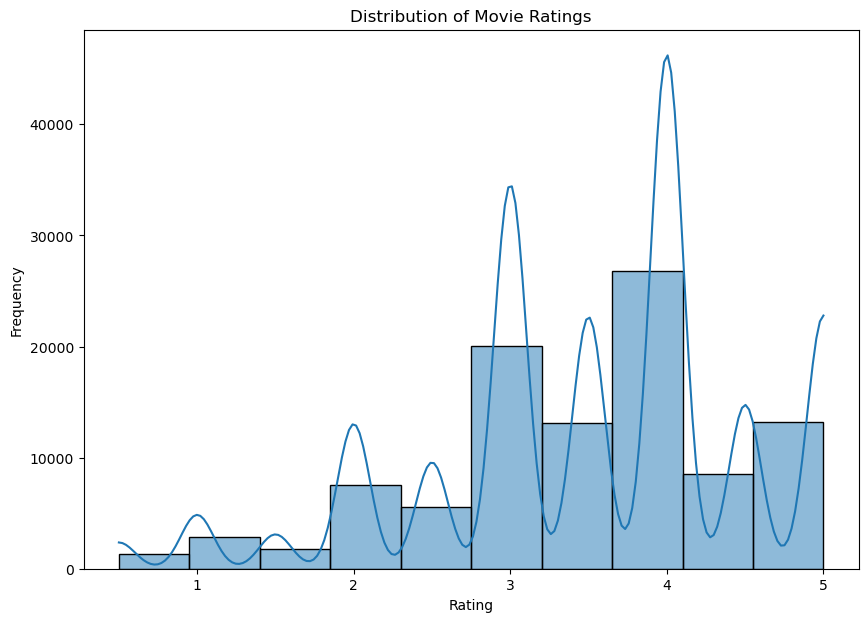

In [19]:
# Univariate Analysis for Ratings
plt.figure(figsize=(10, 7))
sns.histplot(movies_ratings_df['rating'], bins=10, kde=True)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

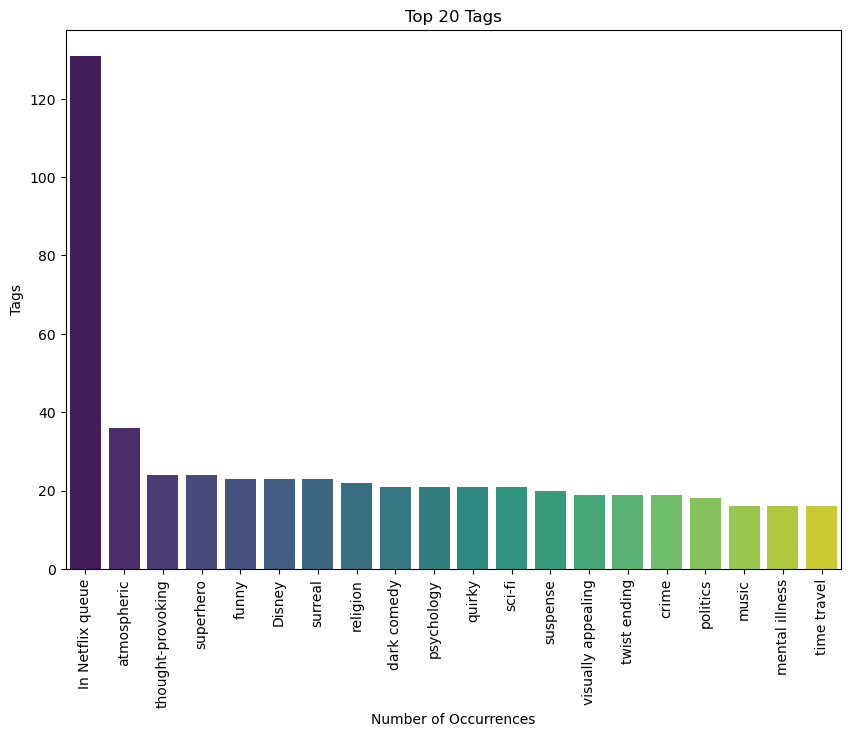

In [20]:
# Univariate Analysis for Tags
plt.figure(figsize=(10, 7))
tag_counts = movies_tags_df['tag'].value_counts().head(20)  # Top 20 tags
sns.barplot(x=tag_counts.index, y=tag_counts.values, palette="viridis")
plt.xticks(rotation=90)
plt.title('Top 20 Tags')
plt.xlabel('Number of Occurrences')
plt.ylabel('Tags')
plt.show()

**Bivariate Analysis**

To understand the relationship between user preferences and movie recommendations, we need to compare the following features:
1. **Ratings vs. Genres:** to understand the distribution of ratings across different genres.
2. **Ratings vs. Tags:** to explore how different keywords associated with movies, relate to user ratings.
3. **Genres vs. Tags:** Analyzes the correlation between movie genres and tags to identify common themes and preferences.
4. **User Ratings vs. User Preferences:** Investigates how user ratings correlate with their stated preferences in genres.

In [21]:
movies_ratings_df.head()

movieId             title                                       genres  \
0        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
1        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
2        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
3        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
4        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   

   (no genres listed)  Action  Adventure  Animation  Children  Comedy  Crime  \
0                   0       0          1          1         1       1      0   
1                   0       0          1          1         1       1      0   
2                   0       0          1          1         1       1      0   
3                   0       0          1          1         1       1      0   
4                   0       0          1          1         1       1      0   

   ...  Musical  Mystery  Romance  Sci-Fi  Thriller  War  Western  userId  \
0  ...        0        0        0       0         0    0        0     1.0   
1  ...        0        0        0       0         0    0        0     5.0   
2  ...        0        0        0       0         0    0        0     7.0   
3  ...        0        0        0       0         0    0        0    15.0   
4  ...        0        0        0       0         0    0        0    17.0   

   rating           timestamp  
0     4.0 2000-07-30 18:45:03  
1     4.0 1996-11-08 06:36:02  
2     4.5 2005-01-25 06:52:26  
3     2.5 2017-11-13 12:59:30  
4     4.5 2011-05-18 05:28:03  

[5 rows x 26 columns]

In [ ]:
# Plot
plt.figure(figsize=(10, 6))
plt.bar(movies_ratings_df['genres'], movies_ratings_df['rating'])
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.title('Average Rating by Genre')
plt.show()
